<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Amazon_Product_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import nltk
nltk.download('vader_lexicon')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Adding error handling to ignore bad lines and setting quoting to 3
data = pd.read_csv("Reviews.csv", on_bad_lines='skip', quoting=3)
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   Id   ProductId          UserId    ProfileName HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW     delmartian                    1   
1   2  B00813GRG4  A1D87F6ZCVE5NK         dll pa                    0   
2   4  B000UA0QIQ  A395BORC6FGVXV           Karl                    3   
3   9  B000E7L2R4  A1MZYO9TZK0BBI       R. James                    1   
4  10  B00171APVA  A21BT40VZCCYT4  Carol A. Reed                    0   

  HelpfulnessDenominator Score        Time                Summary  \
0                      1     5  1303862400  Good Quality Dog Food   
1                      0     1  1346976000      Not as Advertised   
2                      3     2  1307923200         Cough Medicine   
3                      1     5  1322006400             Yay Barley   
4                      0     5  1351209600       Healthy Dog Food   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  "Product arrived labeled as Jumbo

<ipython-input-4-f1f656d26624>:11: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Reviews.csv", on_bad_lines='skip', quoting=3)


In [5]:
print(data.describe())

                  Id
count  277845.000000
mean   308857.444438
std    121669.772222
min         1.000000
25%    256957.000000
50%    330602.000000
75%    404069.000000
max    477777.000000


In [6]:
data = data.dropna()

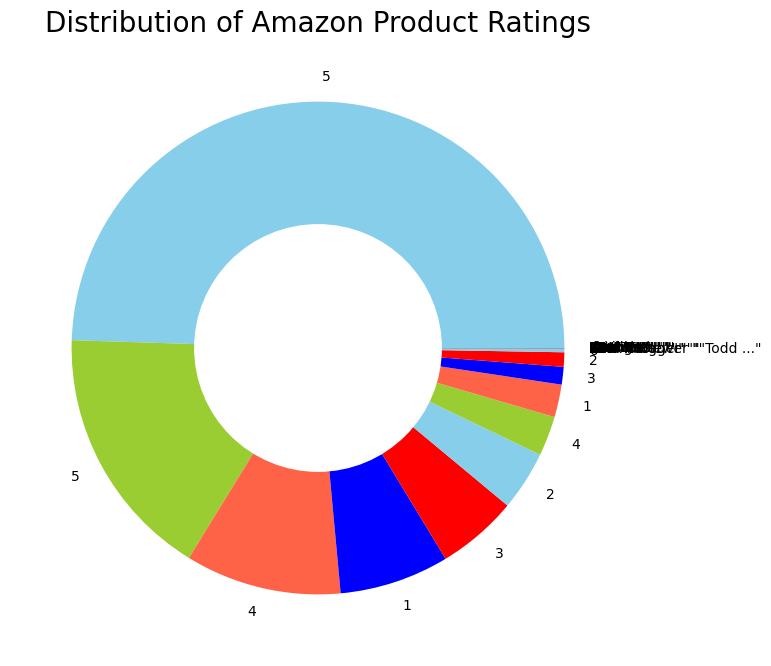

In [7]:
ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

In [8]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]
print(data.head())

   Id   ProductId          UserId    ProfileName HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW     delmartian                    1   
1   2  B00813GRG4  A1D87F6ZCVE5NK         dll pa                    0   
2   4  B000UA0QIQ  A395BORC6FGVXV           Karl                    3   
3   9  B000E7L2R4  A1MZYO9TZK0BBI       R. James                    1   
4  10  B00171APVA  A21BT40VZCCYT4  Carol A. Reed                    0   

  HelpfulnessDenominator Score        Time                Summary  \
0                      1     5  1303862400  Good Quality Dog Food   
1                      0     1  1346976000      Not as Advertised   
2                      3     2  1307923200         Cough Medicine   
3                      1     5  1322006400             Yay Barley   
4                      0     5  1351209600       Healthy Dog Food   

                                                Text  Positive  Negative  \
0  I have bought several of the Vitality canned d...     0.305     0.0

In [9]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [10]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  57700.989999993886
Negative:  11058.471000000205
Neutral:  208899.18599998637
